In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the vehicles.csv dataset.
ucs_df = pd.read_csv('vehicles_processed.csv')
ucs_df.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
0,31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,full-size,truck,al
1,55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8,diesel,88000.0,clean,automatic,4wd,full-size,pickup,al
2,59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6,gas,95000.0,clean,automatic,fwd,full-size,mini-van,al
3,65,7312847466,auburn,22500,2001.0,ford,f450,good,8,diesel,144700.0,clean,manual,rwd,full-size,truck,al
4,73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,al


In [5]:
ucs_df.shape

(82051, 17)

In [6]:
ucs_df.dtypes



Unnamed: 0        int64
id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders         int64
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
state            object
dtype: object

In [7]:
ucs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82051 entries, 0 to 82050
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    82051 non-null  int64  
 1   id            82051 non-null  int64  
 2   region        82051 non-null  object 
 3   price         82051 non-null  int64  
 4   year          82051 non-null  float64
 5   manufacturer  82051 non-null  object 
 6   model         82051 non-null  object 
 7   condition     82051 non-null  object 
 8   cylinders     82051 non-null  int64  
 9   fuel          82051 non-null  object 
 10  odometer      82051 non-null  float64
 11  title_status  82051 non-null  object 
 12  transmission  82051 non-null  object 
 13  drive         82051 non-null  object 
 14  size          82051 non-null  object 
 15  type          82051 non-null  object 
 16  state         82051 non-null  object 
dtypes: float64(2), int64(4), object(11)
memory usage: 10.6+ MB


In [8]:

print(ucs_df.isnull().sum())

Unnamed: 0      0
id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
state           0
dtype: int64


### Checking the distribution of a categorical data

### title_status

In [9]:
ucs_df['title_status'].unique()

array(['clean', 'rebuilt', 'salvage', 'lien', 'missing', 'parts only'],
      dtype=object)

In [10]:
title_status_count = ucs_df.title_status.value_counts()
title_status_count

clean         77226
rebuilt        2761
salvage        1158
lien            687
missing         171
parts only       48
Name: title_status, dtype: int64

In [11]:
label_encoder = preprocessing.LabelEncoder()
ucs_df['title_status'] = label_encoder.fit_transform(ucs_df['title_status'])

In [12]:
# ucs_df1= ucs_df[ucs_df["title_status"]!= "missing"]

In [13]:
# ucs_df1= ucs_df[ucs_df["title_status"]!= "parts only"]

In [14]:
## drop missing and parts only values from title_status
ucs_df.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
0,31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6,gas,128000.0,0,automatic,rwd,full-size,truck,al
1,55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8,diesel,88000.0,0,automatic,4wd,full-size,pickup,al
2,59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6,gas,95000.0,0,automatic,fwd,full-size,mini-van,al
3,65,7312847466,auburn,22500,2001.0,ford,f450,good,8,diesel,144700.0,0,manual,rwd,full-size,truck,al
4,73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,4,automatic,rwd,mid-size,sedan,al


In [15]:
# ucs_df['manufacturer'].unique()

In [16]:
# ucs_df['model'].unique()

In [17]:
# model_count = ucs_df.model.value_counts()
# model_count

### condition

In [18]:
# ucs_df1['condition'].unique()

In [19]:
# condition_count = ucs_df1.condition.value_counts()
# condition_count

In [20]:
# ucs_df1["condition"].replace(["like new"], "excellent")

In [21]:
 ucs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82051 entries, 0 to 82050
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    82051 non-null  int64  
 1   id            82051 non-null  int64  
 2   region        82051 non-null  object 
 3   price         82051 non-null  int64  
 4   year          82051 non-null  float64
 5   manufacturer  82051 non-null  object 
 6   model         82051 non-null  object 
 7   condition     82051 non-null  object 
 8   cylinders     82051 non-null  int64  
 9   fuel          82051 non-null  object 
 10  odometer      82051 non-null  float64
 11  title_status  82051 non-null  int32  
 12  transmission  82051 non-null  object 
 13  drive         82051 non-null  object 
 14  size          82051 non-null  object 
 15  type          82051 non-null  object 
 16  state         82051 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(10)
memory usage: 10.3+ MB


In [22]:
# label_encoder = preprocessing.LabelEncoder()
# ucs_df['title_status'] = label_encoder.fit_transform(ucs_df['title_status'])

### fuel

In [23]:
# ucs_df1["fuel"].unique()

In [24]:
# fuel_count = ucs_df1.fuel.value_counts()
# fuel_count

In [25]:
# ucs_df1= ucs_df[ucs_df["fuel"]!= "other"]

In [26]:
# ucs_df1.describe()

### drive

In [27]:
# ucs_df1["drive"].unique()

In [28]:
# drive_count = ucs_df1.drive.value_counts()
# drive_count

### transmission

In [29]:
# ucs_df1["transmission"].unique()

In [30]:
# transmission_count = ucs_df1.transmission.value_counts()
# transmission_count

### size

In [31]:
# ucs_df1["size"].unique()

In [32]:
# size_count = ucs_df.size.value_counts()
# size_count

### type

In [33]:
# ucs_df1["type"].unique()

In [34]:
# type_count = ucs_df.type.value_counts()
# type_count

### state

In [35]:
# ucs_df1["state"].unique()

In [36]:
# #changing from states to regions
# ucs_df1=ucs_df1.replace(to_replace=['ca','or','wa','hi','ak','nv','id','mt','wy','ut','co','az','nm'], value='west')
# ucs_df1=ucs_df1.replace(to_replace=['nd','sd','ne','ks','mn','ia','mo','wi','il','mi','in','oh'], value='midwest')
# ucs_df1=ucs_df1.replace(to_replace=['pa','ny','vt','me','nh','ma','ct','ri','nj'], value='northeast')
# ucs_df1=ucs_df1.replace(to_replace=['tx','ok','ar','la','ky','tn','ms','al','de','md','dc','wv','va','nc','sc','ga','fl'], value='south')

In [37]:
# removing decimal from year column
ucs_df['year'] = (ucs_df['year']).astype(int) 

In [38]:
ucs_df.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
0,31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,0,automatic,rwd,full-size,truck,al
1,55,7314560853,auburn,19900,2004,ford,f250 super duty,good,8,diesel,88000.0,0,automatic,4wd,full-size,pickup,al
2,59,7313406529,auburn,14000,2012,honda,odyssey,excellent,6,gas,95000.0,0,automatic,fwd,full-size,mini-van,al
3,65,7312847466,auburn,22500,2001,ford,f450,good,8,diesel,144700.0,0,manual,rwd,full-size,truck,al
4,73,7312144944,auburn,15000,2017,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,4,automatic,rwd,mid-size,sedan,al


In [45]:
fuel = ucs_df["fuel"]
price = ucs_df["price"]
transmission = ucs_df["transmission"]
year = ucs_df["year"]
odometer = ucs_df ["odometer"]

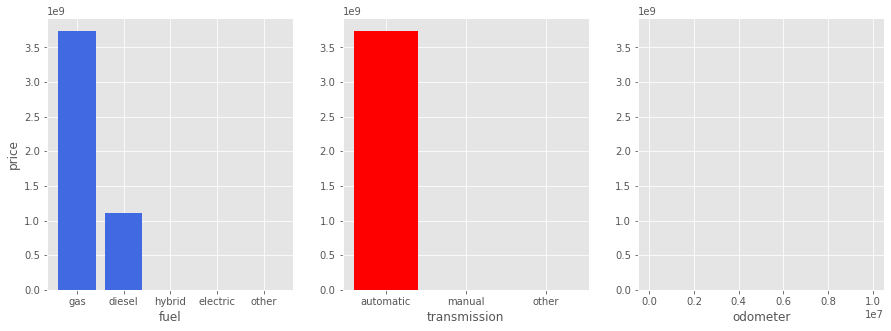

In [46]:
## Data Visualization
plt.style.use("ggplot")
fig = plt.figure(figsize = (15, 5))
ax2 = plt.axes()
#fig.subtitle("Visualizing categorical data columns")
plt.subplot(1,3,1)
plt.bar(fuel,price, color= "royalblue")
plt.xlabel("fuel")
plt.ylabel("price")
plt.subplot(1,3,2)
plt.bar(transmission,price, color= "red")
plt.xlabel("transmission")

plt.subplot(1,3,3)
plt.bar(odometer,price, color= "purple")
plt.xlabel("odometer")

plt.show()


In [ ]:
# Drop columns that is not needed (Please select whatever columns we would not need)
ucs_df1 = ucs_df.drop(columns=['id','region','manufacturer','model','type','state', 'condition','cylinders', 'fuel', 'transmission','size', 'drive'])

In [ ]:
ucs_df1

## Encoding the Categorical Data

In [ ]:
# #encoding fuel column
# ucs_df2.replace({"fuel" :{"gas": 0, "diesel" :1, "hybrid" : 2 , "other" :3, "electric" : 4}}, inplace = True)

In [ ]:
#encoding title_status column
# ucs_df2.replace({"title_status" :{"clean": 0, "rebuilt" :1, "salvage" : 2 , "otherlien" :3}}, inplace = True)

In [ ]:
#encoding condition column
#ucs_df2.replace({"condition" :{"new": 0, "excellent" :1, "good" : 2 , "fair" :3, "salvage" : 4}}, inplace = True)

In [ ]:
#encoding transmission column
# ucs_df2.replace({"transmission" :{"automatic": 0, "manual" :1, "other" :3}}, inplace = True)

In [ ]:
#encoding drive column
# ucs_df2.replace({"drive" :{"fwd": 0, "rwd" :1, "4wd" : 2}}, inplace = True)

In [ ]:
#encoding size column
# ucs_df2.replace({"size" :{"full-size": 0, "mid-size" :1, "compact" : 2 , "sub-compact" :3}}, inplace = True)

In [ ]:
#encoding state column
# ucs_df2.replace({"state" :{"west": 0, "midwest" :1, "northeast" : 2 , "south" :3}}, inplace = True)

In [ ]:
#ucs_df2= ucs_df2[ucs_df2["title_status"]!= "missing"]

In [ ]:
#ucs_df2= ucs_df2[ucs_df2["title_status"]!= "parts only"]

In [ ]:
#ucs_df2

In [ ]:
lower_limit = np.percentile(ucs_df2[['price']], 5)
upper_limit = np.percentile(ucs_df2[['price']], 95)
print(lower_limit, upper_limit)

In [ ]:
ucs_df2 = ucs_df2[(ucs_df2['price'] >= lower_limit) & (ucs_df2['price'] <= upper_limit)]  #Removing outliers
ucs_df2.shape

# Split the Data into Training and Target

In [ ]:
# Create our features
X = ucs_df2
X=X.drop(["price"],axis=1)
X=pd.get_dummies(X)


# Create our target
y = ucs_df2["price"]

In [ ]:
X

In [ ]:
print(X)

In [ ]:
print(y)

# Split the Data into Training and Testing 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2)

# Model Traing
## Linear Regression

In [ ]:
# Loadinf the Linear Regression model
lin_reg_model = LinearRegression()

In [ ]:
#fitting data to the linear Regression model
lin_reg_model.fit(X_train, y_train)

### Model Evaluation

In [ ]:
# prediction on Training data
y_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(y_train, y_prediction)
print("R Squared Error_score : ",error_score)

## Visualize the Actual and Predicted prices

In [ ]:
# X_train=np.arange(0,len(X_train),1)

In [ ]:
X_train.shape

In [ ]:
plt.scatter(y_train,y_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error_score : ",error_score)

In [ ]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# Result of prediction
data = {'price': y_test,
       'prediction': y_prediction}
df_pred = pd.DataFrame(data)

In [ ]:
# Loadinf the Linear Regression model
lass_reg_model = Lasso()

In [ ]:
#fitting data to the linear Regression model
lass_reg_model.fit(X_train, y_train)

In [ ]:
# prediction on Training data
y_prediction = lass_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(y_train, y_prediction)
print("R Squared Error_score : ",error_score)

In [ ]:
# X_train=np.arange(0,len(X_train),1)

In [ ]:
plt.scatter(y_train,y_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Testing data
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error_score : ",error_score)

In [ ]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()